<a href="https://colab.research.google.com/github/raflisbk/FPorbit/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import layers, Input
from keras.layers import InputLayer, MaxPooling2D, Flatten, Dense, Conv2D, Dropout
from keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions, ResNet50
from tensorflow.keras.optimizers import Adam, SGD
from keras.preprocessing.image import load_img
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from PIL.Image import open
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
import pandas as pd
import numpy as np
import timeit
import copy
import os
import tensorflow
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.applications.mobilenet  import MobileNet
from keras.applications.vgg19 import VGG19
from keras.applications.resnet import ResNet152
from keras.applications.densenet import DenseNet121
from keras.applications.efficientnet import EfficientNetB0
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,GlobalAveragePooling2D,Dropout
from keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle
from keras.applications.xception import preprocess_input
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,  classification_report
from keras import regularizers
from sklearn import svm
from tensorflow.keras.applications import DenseNet121

In [6]:
DATADIR = ('/content/drive/MyDrive/FPorbit/train')
Classes = ["Open", "Closed"]

training_Data = []
imgSize = 224

def Preprocessing():
    x=[]
    y=[]
    namesopen=os.listdir('/content/drive/MyDrive/FPorbit/train/Open')
    namesclosed=os.listdir('/content/drive/MyDrive/FPorbit/train/Closed')
    for i in namesopen:
        imgpath = os.path.join('/content/drive/MyDrive/FPorbit/train/Open', i)
        img=cv2.imread(imgpath)
#         img=preprocess_input(img)
        img = img[:, :, [2, 1, 0]]
        img=cv2.resize(img,(224,224))
        x.append(img)
        y.append(1)
    for i in namesclosed:
        imgpath = os.path.join('/content/drive/MyDrive/FPorbit/train/Closed', i)
        img=cv2.imread(imgpath)
#         img=preprocess_input(img)
        img = img[:, :, [2, 1, 0]]
        img=cv2.resize(img,(224,224))
        x.append(img)
        y.append(0)
   
    X=np.array(x)
    Y=np.array(y)
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
    print("Done")
    return x_train,x_test,y_train,y_test

In [7]:
x_train,x_test,y_train,y_test=Preprocessing()
random.shuffle(training_Data)

x = []
y = []

for features, label in training_Data:
    x.append(features)
    y.append(label)


x = np.array(x).reshape(-1, imgSize, imgSize, 3)

y = np.array(y)

Done


In [8]:
model=Sequential()
model.add(VGG16(weights='imagenet',input_shape=(224,224,3),include_top=False))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 14,739,777
Trainable params: 14,739,777
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
mc=ModelCheckpoint(monitor="val_accuracy",filepath='./bestModel.h5',verbose=2,save_best_only=True,mode='auto')

In [11]:
validation_set=(x_test,y_test)
# validation_set
# (x_train,y_train)
# len(validation_set)

In [13]:
start = timeit.default_timer()
history=model.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=validation_set,callbacks=[mc])
stop = timeit.default_timer()

Epoch 1/5
31/31 [==============================] - ETA: 0s - loss: 9.7991 - accuracy: 0.6292  
Epoch 1: val_accuracy improved from -inf to 0.48178, saving model to ./bestModel.h5
31/31 [==============================] - 1693s 55s/step - loss: 9.7991 - accuracy: 0.6292 - val_loss: 5.9195 - val_accuracy: 0.4818
Epoch 2/5
31/31 [==============================] - ETA: 0s - loss: 0.9099 - accuracy: 0.5350 
Epoch 2: val_accuracy improved from 0.48178 to 0.52227, saving model to ./bestModel.h5
31/31 [==============================] - 1684s 54s/step - loss: 0.9099 - accuracy: 0.5350 - val_loss: 0.6979 - val_accuracy: 0.5223
Epoch 3/5
31/31 [==============================] - ETA: 0s - loss: 0.6790 - accuracy: 0.5664 
Epoch 3: val_accuracy improved from 0.52227 to 0.84211, saving model to ./bestModel.h5
31/31 [==============================] - 1687s 54s/step - loss: 0.6790 - accuracy: 0.5664 - val_loss: 0.4364 - val_accuracy: 0.8421
Epoch 4/5
31/31 [==============================] - ETA: 0s - lo

In [14]:
print("fit time")
print(stop-start)

fit time
8482.005671545001


closed


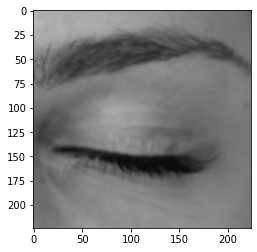

In [15]:
img = cv2.imread('/content/drive/MyDrive/FPorbit/test/Closed/_107.jpg', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(imgSize, imgSize))
x_input = np.array(new_array).reshape(1,imgSize, imgSize,3)

plt.imshow( new_array)
# x_input = x_input/255.0

predictionClosed = model.predict(x_input)
if predictionClosed <0.5:
    print('closed')
else:
    print('open')

open


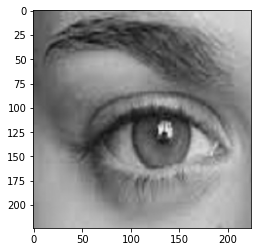

In [16]:
img = cv2.imread('/content/drive/MyDrive/FPorbit/test/Open/_107.jpg', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(imgSize, imgSize))
x_input = np.array(new_array).reshape(1,imgSize, imgSize,3)

plt.imshow( new_array)
# x_input = x_input/255.0

predictionOpen = model.predict(x_input)
if predictionOpen <0.5:
    print('closed')
else:
    print('open')

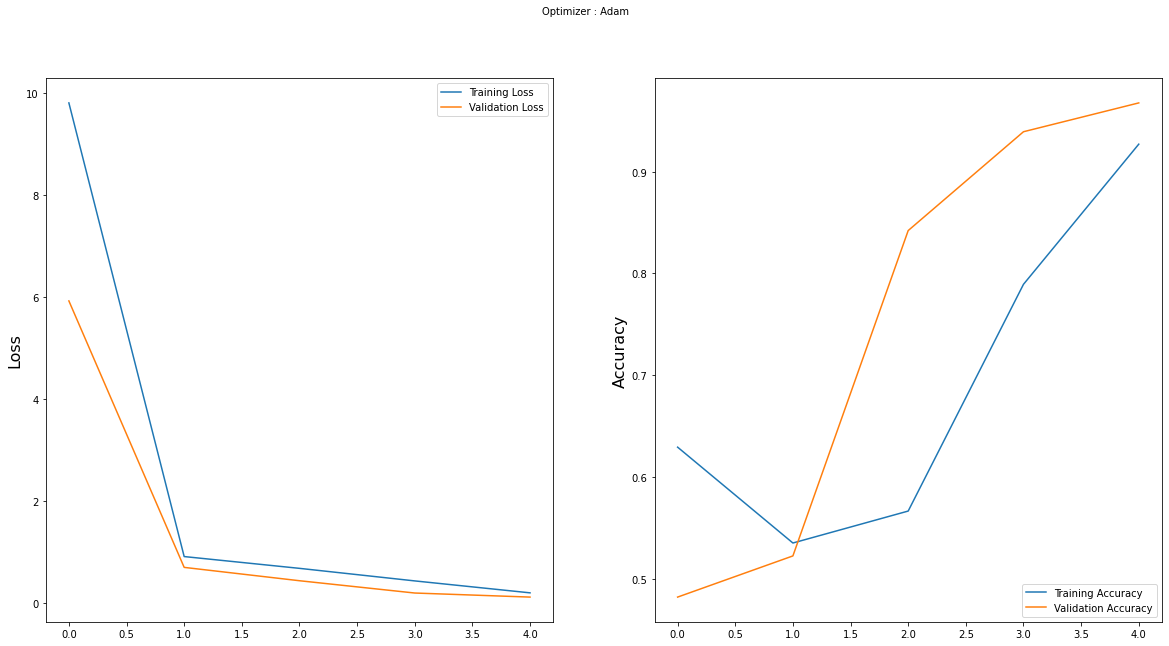

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [18]:
pretrained_cnn =load_model('./bestModel.h5')

# evaluate model on holdout set
eval_score = pretrained_cnn.evaluate(x_test,y_test)
# print loss score
print('Eval loss:',eval_score[0])
# print accuracy score
print('Eval accuracy:',eval_score[1] )

8/8 [==============================] - 115s 14s/step - loss: 0.1158 - accuracy: 0.9676
Eval loss: 0.11577123403549194
Eval accuracy: 0.9676113128662109
